In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import integrate
matplotlib.rcParams.update({'font.size': 22})

# Вычислительная математика
## Численное интегрирование

## Задача численного интегрирования
Дана процедура вычисления значений $f(x)$. Найти приближенное значение определенного интеграла
$$
S(f) \approx I(f) = \int_a^b f(x) dx
$$

Основная идея:
* Приблизить $f$ *простой* функцией $\phi$, а функцию $\phi$ проинтегрировать аналитически

## Интерполяционные квадратурные формулы

* Рассмотрим отрезок $[-1,1]$, отобразим его на $[a,b]$:
$$
x = x(t) = \frac{a+b}{2} + \frac{b - a}{2} t
$$
Выберем различные узлы $t_1, \ldots, t_n \in [-1,1]$ и $x_i = x(t_i)$

* Построим интерполяционный многочлен:
$$
L_{n-1}(x) = \sum_{i=1}^n f(x_i) \prod_{j=1, \; j\ne i}^n \frac{x -x_j}{x_i - x_j}
$$

* Проинтегрируем по $[a,b]$
$$
S(f) = \int_a^b L_{n-1} (x) \, dx = \sum_{i=1}^n d_i \, f(x_i), \quad d_i = \frac{b-a}{2} \int_{-1}^1 \prod_{j=1,\;j\ne i}^n \frac{t - t_j}{t_i - t_j} \, dt
$$
* Формулы, полученные путем интегрирования интерполяционного многочлена называют формулами *Ньютона-Котеса*.

## Интерполяционные формулы, оценка ошибки

Если $f \in C^n[a,b]$, то из формулы для ошибки интерполяции получаем:
$$
\lvert I(f) - S(f) \rvert \le \frac{\lVert f^{(n)}\rVert_{C[a,b]}}{n!} \left( \frac{b-a}{2} \right)^{n+1} \int_{-1}^{+1} \bigg| \prod_{j=1}^n (t -t_j)\bigg| \, dt
$$

### Алгебраическая точность
* $S(f)$ имеет алгебраическую точность $m$, если она точна для многочленов степени $\le m$.  
* **Теорема:** Квадратурная формула $S$ с $n$ узлами имеет алгебраическую точность $m \ge n-1$ $\Leftrightarrow$ она является интерполяционной квадратурной формулой.

* $\Leftarrow$ По построению
* $\Rightarrow$ Подставим вместо $f$ многочлены Лагранжа $l_i(x)$, для которых формула точна.

## Примеры квадратурных формул

1) *Формула прямоугольников с центральной точкой* (далее $h = b - a$): 
$$ S(f) = f(\frac{a+b}{2}) h, \,  \quad \lvert I(f) - S(f)\rvert \le \frac{1}{4}M_1 h^2$$  
Ту же формулу можно получить из линейной интерполяции Эрмита для кратного узла $t_1 = t_2 = 0$: $H(t) = f(0) + f'(0) t$. Следовательно, для $f \in C^2$:$\lvert I(f) - S(f) \rvert \le \frac{1}{24} M_2 h^3$



2) *Формула трапеций*: 
$$
S(f) = \frac{1}{2} (f(a) + f(b)) h, \quad \lvert I(f) - S(f)\rvert \le \frac{1}{12} M_2 h^3
$$

3) *Формула Симпсона*: обычная интерполяция по 3-м точкам $-1,0,+1$ и эрмитова интерполяция с кратным узлом $-1,0,0,+1$ дают один и тот же результат:
$$
S(f) = \frac{h}{6} \left(f(a) + 4f(\frac{a+b}{2}) + f(b)\right)
$$

## Составные квадратурные формулы
Часто применяют составные квадратурные формулы:
* отрезок $[a,b]$ разбивается на $n$ отрезков длины $h = \frac{b-a}{n}$
* на каждом отрезке применяется квадратурная формула, результаты складываются
* если квадратурная формула имеет порядок точности $p$, то для составной формулы получается  порядок $p-1$:
$$
E = n O(h^p) = \frac{b-a}{h} O(h^{p}) = O(h^{p-1}) 
$$

1.2417635808503746e-09


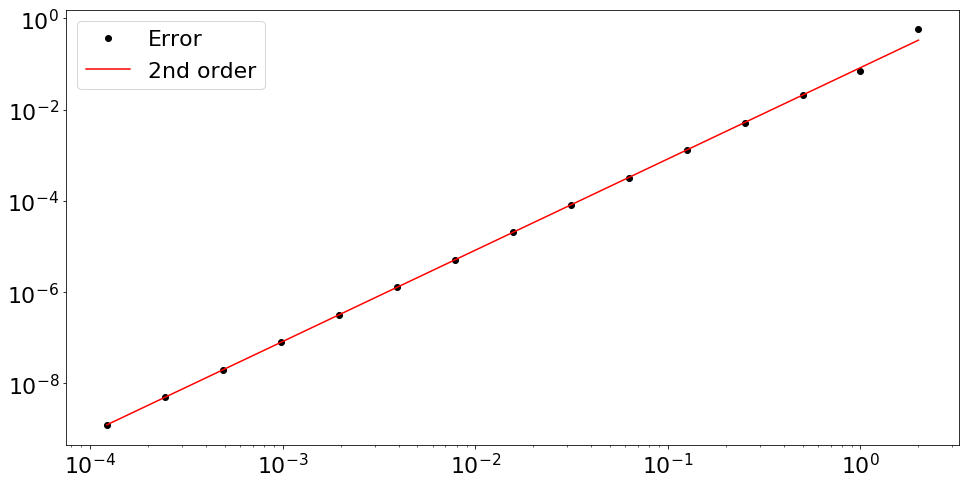

In [25]:
f = lambda x: 1/(1 + x**2)
I_ex = np.pi/2 
N = 15
err = np.zeros(N)
h = 2/2**np.arange(N)
n = 2**np.arange(N)
for k in range(N):
    x = np.linspace(-1, 1, n[k] + 1)
    fval = f(x)
    I_tr = h[k] * (np.sum(fval) - 0.5*(fval[0] + fval[-1]))
    err[k] = np.abs(I_tr - I_ex)
fig, ax = plt.subplots(figsize = (16,8))
plt.loglog(h, err, 'ko', label = 'Error')
plt.loglog(h, err[-1]*(h/h[-1])**2, 'r-', label = '2nd order')
plt.legend()
print(err[-1])

## Квадратурные формулы Гаусса-Кристофеля

* Интерполяционные формулы по *любым* $n$ узлам имеют алгебраическую точность не ниже $n-1$ 

* Можно ли подобрать узлы так, чтобы точность была $2n-1$? Иначе говоря, есть ли решение у системы:
$$
\sum_{i=1}^{n} d_i x_i^k = \int_{-1}^{1} x^k \, k=0,\ldots, 2n-1 
$$

**Теорема:** *Для любого числа узлов $n$ существует единственная квадратурная формула с алгебраической точностью $2n-1$ *

## Квадратурные формулы Гаусса-Кристофеля  
1) Обозначим $\displaystyle \omega_n =\prod_{j=1}^n (x - x_j)$. Если существует формула точности $2n$, то $I(\omega^n) = \sum d_i \omega^2(x_i) = 0$ - противоречие.

2) Если формула имеет точность $2n - 1$, то 
$$
I \big(\omega_n(x) r_{n-1}(x)\big) = S\big(\omega_n(x) r_{n-1}(x)\big) = 0, \; \forall \, r_{n-1} \in \mathcal{P}_{n-1}
$$
*Следовательно, $\omega_n$ - $n$-й многочлен из последовательности ортогональных многочленов.* 

3) Такой многочлен определяется однозначно с точностью до нормировки и имеет $n$ корней $x_1,\ldots, x_n$ внутри отрезка $[a,b]$.   
Т.к. формула является интерполяционной, то веса вычисляются по формуле:
$$
\quad d_i = \frac{b-a}{2} \int_{-1}^1 \prod_{j=1,\;j\ne i}^n \frac{t - t_j}{t_i - t_j} \, dt
$$

4) Проверим, что точность равна $2n-1$
$$
p_{2n-1}(x) = q_{n-1}(x) \omega_n(x) + r_{n-1}(x) \Rightarrow \; I(p_{2n-1}) = I(q_{n-1} \omega_n) + I(r_{n-1}) = S(r_{n-1}) = S(q_{n-1} \omega_n) + S(r_{n-1}) = S(p_{2n-1})
$$

In [26]:
f = lambda x: 1/(1 + x**2)
I_ex = np.pi/2 
n = 20000
h = 2/n
err = np.zeros(N)
x = np.linspace(-1, 1, n+1)
fval = f(x)
I_tr = h * (np.sum(fval) - 0.5*(fval[0] + fval[-1]))
#
Ig, a = integrate.fixed_quad(f, -1, 1, n = 20)
print('Error trap = ', np.abs(I_tr - I_ex), 'Error gauss = ', np.abs(Ig - I_ex))

Error trap =  8.333331802390376e-10 Error gauss =  1.5543122344752192e-15


## Правило Рунге для оценки погрешности интегрирования
* Обычно, величина производных функции заранее неизвестна


* Рассмотрим формулу $S_1$ точности $n-1$ на отрезке длины $h$, пусть $c$ - серидина отрезка, тогда:
$$
I(f) - S_1(f) = \alpha f^{(n)}(c) h^{n+1} + O(h^{n+2})
$$

* Пусть $S_2$ - составная формула по 2-м половинкам того же отрезка:
$$
I(f) - S_2(f) = \alpha f^{(n)}(c)\frac{h^{n+1}}{2^n} + O(h^{n+2})
$$

* С точностью до членов $O(h^{n+2})$ получаем:
$$
I(f) - S_2(f) \approx \frac{S_2 - S_1}{2^n - 1}
$$

## Вычисление несобственных интегралов
$$
\int_{a}^b f(x) \, dx, \quad f(x) \to \infty \mbox{ при } x \to a \quad \int_0^1 \frac{\cos x}{\sqrt{x}}\, dx
$$
Производные неограничены, поэтому обычные формулы не применимы.

* **Замена переменной**
$$
x = t^2 \Rightarrow I = 2 \int_{0}^{1} \cos t^2 \, dt
$$

* **Интегрирование по частям**
$$
I = \int_0^1 \frac{\cos x}{\sqrt{x}}\, dx = 2 \sqrt{x} \cos x\bigg|_0^1 + 2 \int_0^1 \sqrt{x} \sin x \, dx
$$
Второй интеграл можно вычислить, но **2-я производная не ограничена**, поэтому имеет смысл ещё раз проинтегрировать по частям.

*  **Выделение особенности**
$$
I = I_1 + I_2 = \int_0^\delta \frac{\cos x}{\sqrt{x}} \,dx + \int_{\delta}^1 \frac{\cos x}{\sqrt{x}}\,dx, \quad I_1 = \int_0^\delta \frac{1 - \displaystyle \sum_{k=0}^\infty (-1)^k\frac{x^{2k}}{2k!}}{\sqrt{x}} \, dx = \sum_{k=0}^n \frac{(-1)^k \delta^{2k+1/2}}{2k+1/2} + R
$$
$R$ по модулю не больше последнего члена частичной суммы

## Интегралы от осциллирующих функций

* Часто возникают интегралы вида: 
$$
\int_{-1}^{1} f(x) \cos(kx) \, dx
$$
Для вычисления по обычным квадратурным формулам нужно взять очень много узлов.

* Можно приблизить функцию $f$, например, многочленом, и вычислить интеграл аналитически.